## Effective Five Orbital Model in Fe-based Superconductor

#### Muhammad Gaffar
---------------------------------------------------

In this tutorial, we will try the minimal TB model for five orbital model in LaFeAsO$_{1-x}$F$_x$ material.

This is described by this paper [Phys. Rev. Lett. 101, 087004](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.101.087004).

This material can be seen as effective five-orbital model in square lattice. 

The hamiltonian can be written as

$$
\mathcal{H} = \sum_{ij}\sum_{\mu\nu}\sum_{\sigma}\left[t(x_i-x_j,y_i-y_j;\mu,\nu)c^\dagger_{i\mu\sigma}c_{j\nu\sigma} + t(x_j-x_i,y_j-y_i;\nu,\mu)c^\dagger_{j\nu\sigma}c_{i\mu\sigma}\right] + \sum_{i\mu\sigma}\varepsilon_\mu n_{i\mu\sigma}
$$

the onsite energy are

$$
\mathbf{\varepsilon} = (10.75,10.96,10.96,11.12,10.62) \; \text{eV}
$$

with hopping integral is displayed in table below

![hopping](fig/hopping.png)

So, Let's build the tight binding model!

In [1]:
using PythTB
using PyPlot

In [2]:
#square lattice
lat = [[1,0],[0,1]]
orb = [[0,0],[0,0],[0,0],[0,0],[0,0]]
fe = tb_model(2,2,lat,orb);

the generated hopping matrix have been shown in this [tutorial](https://github.com/cometscome/TightBinding.jl/).

In [3]:
#get index for orbital hopping
imap = zeros(Int64,5,5)
count = 0
for μ in 1:5, ν in μ:5
    count += 1
    imap[μ,ν] = count
end

## basic hopping matrix
# for [a,b]
tmat = [
-0.7    0 -0.4  0.2 -0.1;
-0.8    0    0    0    0;
 0.8 -1.5    0    0 -0.3;
   0  1.7    0    0 -0.1;
-3.0    0    0 -0.2    0;
-2.1  1.5    0    0    0;
 1.3    0  0.2 -0.2    0;
 1.7    0    0  0.2    0;
-2.5  1.4    0    0    0;
-2.1  3.3    0 -0.3  0.7;
 1.7  0.2    0  0.2    0;
 2.5    0    0  0.3    0;
 1.6  1.2 -0.3 -0.3 -0.3;
   0    0    0 -0.1    0;
 3.1 -0.7 -0.2    0    0] .* 0.1

#for [-a,-b]
Is = [1,-1,-1,1,1,1,1,-1,-1,1,-1,-1,1,1,1]
#for [b,a]
σds = [1,-1,1,1,-1,1,-1,-1,1,1,1,-1,1,-1,1]
#for [a,-b]
tmat_σy = tmat[:,:]
tmat_σy[imap[1,2],:] = -tmat[imap[1,3],:]
tmat_σy[imap[1,3],:] = -tmat[imap[1,2],:]
tmat_σy[imap[1,4],:] = -tmat[imap[1,4],:]
tmat_σy[imap[2,2],:] = tmat[imap[3,3],:]
tmat_σy[imap[2,4],:] = tmat[imap[3,4],:]
tmat_σy[imap[2,5],:] = -tmat[imap[3,5],:]
tmat_σy[imap[3,3],:] = tmat[imap[2,2],:]
tmat_σy[imap[3,4],:] = tmat[imap[2,4],:]
tmat_σy[imap[3,5],:] = -tmat[imap[2,5],:]
tmat_σy[imap[4,5],:] = -tmat[imap[4,5],:]

#generate hopping matrix
hoppingmatrix = zeros(Float64,5,5,5,5)
hops = [-2,-1,0,1,2]
hopelements = [[1,0],[1,1],[2,0],[2,1],[2,2]]

for μ = 1:5, ν in μ:5, ii in 1:5
    ihop = hopelements[ii][1]
    jhop = hopelements[ii][2]
    #[a,b],[a,-b],[-a,-b],[-a,b],[b,a],[b,-a],[-b,a],[-b,-a]

    #[a,b]
    i = ihop +3
    j = jhop +3
    hoppingmatrix[μ,ν,i,j]=tmat[imap[μ,ν],ii]
            
    #[a,-b] = σy*[a,b] [1,1] -> [1,-1]
    if jhop != 0
        i = ihop +3
        j = -jhop +3
        hoppingmatrix[μ,ν,i,j]=tmat_σy[imap[μ,ν],ii]
    end

    if μ != ν
        #[-a,-b] = I*[a,b] [1,1] -> [-1,-1],[1,0]->[-1,0]
        i = -ihop +3
        j = -jhop +3
        hoppingmatrix[μ,ν,i,j]=Is[imap[μ,ν]]*tmat[imap[μ,ν],ii]
        
        #[-a,b] = I*[a,-b] = I*σy*[a,b]  #[2,0]->[-2,0]
        if jhop != 0
            i = -ihop +3
            j = jhop +3
            hoppingmatrix[μ,ν,i,j]=Is[imap[μ,ν]]*tmat_σy[imap[μ,ν],ii]
        end
    end
            
    #[b,a],[b,-a],[-b,a],[-b,-a]
    if jhop != ihop
        #[b,a] = σd*[a,b]
        i = jhop +3
        j = ihop +3
        hoppingmatrix[μ,ν,i,j]=σds[imap[μ,ν]]*tmat[imap[μ,ν],ii]
        
        #[-b,a] = σd*σy*[a,b]
        if jhop != 0
            i = -jhop +3
            j = ihop +3
            hoppingmatrix[μ,ν,i,j]=σds[imap[μ,ν]]*tmat_σy[imap[μ,ν],ii]
        end

        if μ != ν
            #[-b,-a] = σd*[-a,-b] = σd*I*[a,b]
            i = -jhop +3
            j = -ihop +3
            hoppingmatrix[μ,ν,i,j]=σds[imap[μ,ν]]*Is[imap[μ,ν]]*tmat[imap[μ,ν],ii]
            
            #[b,-a] = σd*[-a,b] = σd*I*[a,-b] = σd*I*σy*[a,b]  #[2,0]->[-2,0]
            if jhop != 0
                i = jhop +3
                j = -ihop +3
                hoppingmatrix[μ,ν,i,j]=σds[imap[μ,ν]]*Is[imap[μ,ν]]*tmat_σy[imap[μ,ν],ii]
            end
        end
    end
end

#set hopping
for μ in 1:5, ν in μ:5
    for i in 1:5, j in 1:5
        ih = hops[i]
        jh = hops[j]
        if hoppingmatrix[μ,ν,i,j] != 0.0                
            set_hop!(fe,hoppingmatrix[μ,ν,i,j],μ,ν,[ih,jh])
        end
    end
end

#set onsite
onsite = [10.75,10.96,10.96,11.12,10.62]
set_onsite!(fe,onsite);

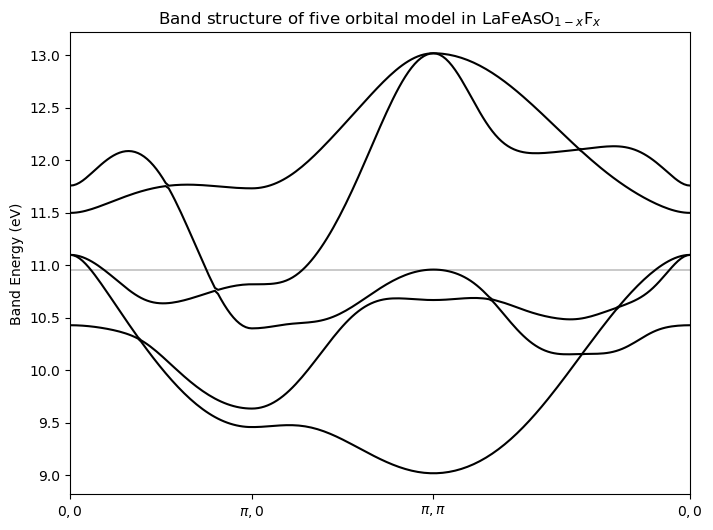

In [4]:
#path in kspace as shown in paper
path = [[0,0],[1/2,0],[1/2,1/2],[0,0]]
k_vec,k_dist,k_node = k_path(fe,path,201)
#solve band
eigvals = solve_eig(fe,k_vec)

#plot
fig, ax = subplots(figsize=(8,6))
ax.plot(k_dist,eigvals',"k")
ax.set_xlim(k_node[1],k_node[end])
ax.set_ylabel("Band Energy (eV)")

labels = [L"$0,0$",L"$\pi,0$",L"$\pi,\pi$",L"$0,0$"]
ax.set_xticks(k_node)
ax.set_xticklabels(labels)
ax.axhline(10.96,linewidth=0.3,color="k");
ax.set_title(L"Band structure of five orbital model in LaFeAsO$_{1-x}$F$_x$");

we successfully reproduce the band structure as shown in PRL paper!